# Importing packages and downloading Twitter language model

In [150]:
import gensim.downloader as api
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
#downloading the glove twitter language model: will take couple minutes
model = api.load("glove-twitter-200")

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#display similarity for a random pair of words
model.similarity('dog','cat')

0.83243024

# Creating the customized similarity matrix with corresponding penalties / rewards

## Define a function to calcualte pair similarity between a number of words

In [35]:
def measure_similarity(list_of_words_1,list_of_words_2):
    similarities=[]
    for i in list_of_words_1:
        for j in list_of_words_2:
            print(i,j)
            similarity=model.wv.similarity(i,j)
            similarities.append(similarity)
            score=np.mean(similarities)
            #mean because some categories contain 2 words (Culture&Society)
    print(similarities)
    return np.mean(similarities)

In [36]:
#test the function on a given sets of words
measure_similarity(['society', 'culture'],
 ['science', 'mathematics'])

society science
society mathematics
culture science
culture mathematics
[0.5503056, 0.3251309, 0.5756938, 0.30077365]


/var/folders/lp/kfk0rkcj6bj31b_4y46369qr0000gn/T/ipykernel_17469/3290809302.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  similarity=model.wv.similarity(i,j)


0.437976

In [46]:
measure_similarity(['health'],
 ['science', 'mathematics'])

health science
health mathematics
[0.5921795, 0.3220128]


/var/folders/lp/kfk0rkcj6bj31b_4y46369qr0000gn/T/ipykernel_17469/3290809302.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  similarity=model.wv.similarity(i,j)


0.45709616

## Apply the measure_similarity function to Yahoo categories 

In [22]:
categories=['society culture','science mathematics',
            'health','education reference',
            'computers internet','sports',
            'business finance','entertainment music',
            'family relationships','politics government']

In [23]:
#tokenize each word
categories_processed=[word_tokenize(i) for i in categories]
categories_processed

[['society', 'culture'],
 ['science', 'mathematics'],
 ['health'],
 ['education', 'reference'],
 ['computers', 'internet'],
 ['sports'],
 ['business', 'finance'],
 ['entertainment', 'music'],
 ['family', 'relationships'],
 ['politics', 'government']]

In [ ]:
#measure similarity
pair_similarities = [(str(p1), str(p2),measure_similarity(p1, p2)) for p1 in categories_processed for p2 in categories_processed]
df_similarities=pd.DataFrame(pair_similarities)

In [153]:
#for same pairs of words similarity ==1
df_similarities.loc[df_similarities[0]==df_similarities[1],2]=1

In [154]:
#prettify the dataframe
for i in range(len(df_similarities[0].unique())):
    df_similarities.replace(df_similarities[0].unique()[i], i,inplace=True)

## Obtain penalties / rewards from similarity scores

In [156]:
#remove pairs with same categories to scale them later
w_arr=df_similarities[2].to_numpy()
w_arr=list(w_arr)
w_arr=np.array([i for i in w_arr if i!=1]).reshape(-1, 1)

Scale the rewards / penalties from -0.5 to 0.5

In [158]:
scaler = MinMaxScaler((-0.5,0.5))
mod=scaler.fit_transform(w_arr)

Plot the resulting rewards / penalties

In [165]:
#insert 0 scores for same categories  previoulsy removed
mod=list(mod.flatten())
for i in range(0,100,11):
    mod.insert(i,0)

In [166]:
#what is the mean reward / penalty
np.mean(mod)

-0.014527781009674072

In [167]:
df_similarities[2]=mod
df_similarities.to_csv('Similarity_df.csv')

## Visualize the resulting penalties / rewards

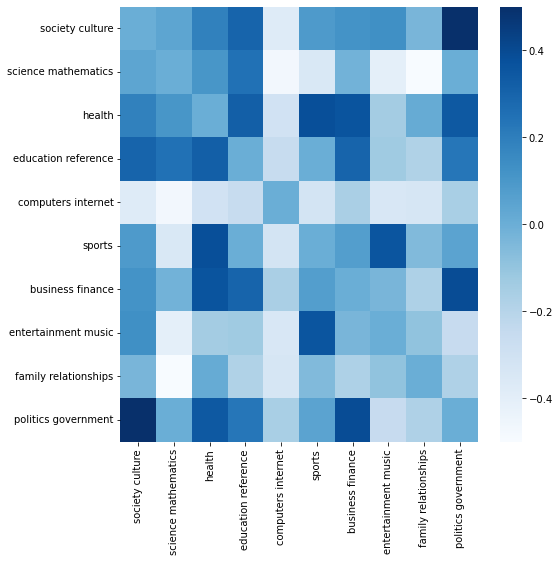

In [168]:
sim_matrix=df_similarities[2].to_numpy()
sim_matrix=sim_matrix.reshape(10,10)
f = plt.figure(figsize=(8,8))
sns.heatmap(sim_matrix,xticklabels=categories,
            yticklabels=categories,cmap='Blues')
plt.show()